In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys
print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("../..")
print("at directory:", os.getcwd())

at directory: /Users/wilka/git/research/jaxneurorl/projects/socialsf
changing to root directory
at directory: /Users/wilka/git/research/jaxneurorl


In [3]:
import jax
from projects.humansf import visualizer

from projects.socialsf.level import Level
from projects.socialsf.maze import Maze
from projects.socialsf.renderer import MazeRenderer


<Axes: >

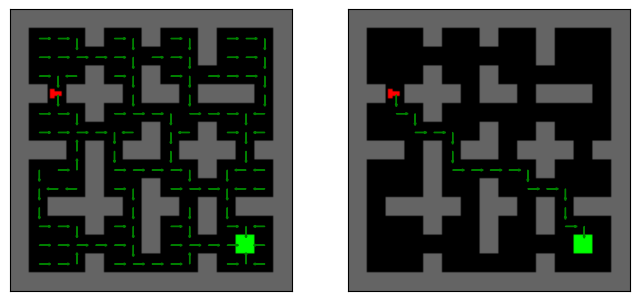

In [109]:
seed=3
rng = jax.random.PRNGKey(seed)

level = Maze1 = """
...#..#..#...
.........#...
...#..#......
#>###.##.###.
...#.........
......#..#...
##.#.##.###.#
...#.....#...
...#..#......
.####.##.#.##
...#..#..#...
......#....G.
...#.....#...
""".strip()

level = Level.from_str(level)

env = Maze(max_height=13, max_width=13, agent_view_size=1, normalize_obs=True)
env_params = env.default_params
obs, env_state = env.reset_to_level(rng, level, env_params)


fig, axs = plt.subplots(1, 2, figsize=(8, 8))
env_renderer = MazeRenderer(env, tile_size=8)
image = env_renderer.render_state(env_state, env_params)
actions = find_optimal_actions(env_state.maze_map, floor_array, wall_array, goal_array)
place_arrows_on_image(image, actions, env_state, ax=axs[0], offset=8)
show_path_to_goal(image, tuple(int(i) for i in env_state.agent_pos), actions, env_state, ax=axs[1], offset=8)

<Axes: >

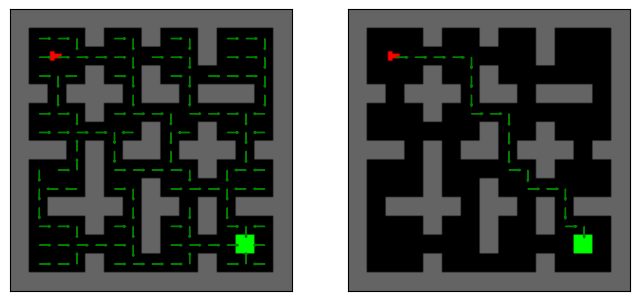

In [110]:
level = Maze1 = """
...#..#..#...
.>.......#...
...#..#......
#.###.##.###.
...#.........
......#..#...
##.#.##.###.#
...#.....#...
...#..#......
.####.##.#.##
...#..#..#...
......#....G.
...#.....#...
""".strip()

level = Level.from_str(level)

env = Maze(max_height=13, max_width=13, agent_view_size=1, normalize_obs=True)
env_params = env.default_params
obs, env_state = env.reset_to_level(rng, level, env_params)


fig, axs = plt.subplots(1, 2, figsize=(8, 8))
env_renderer = MazeRenderer(env, tile_size=8)
image = env_renderer.render_state(env_state, env_params)
actions = find_optimal_actions(env_state.maze_map, floor_array, wall_array, goal_array)
place_arrows_on_image(image, actions, env_state, ax=axs[0], offset=8)
show_path_to_goal(image, tuple(int(i) for i in env_state.agent_pos), actions, env_state, ax=axs[1], offset=8)

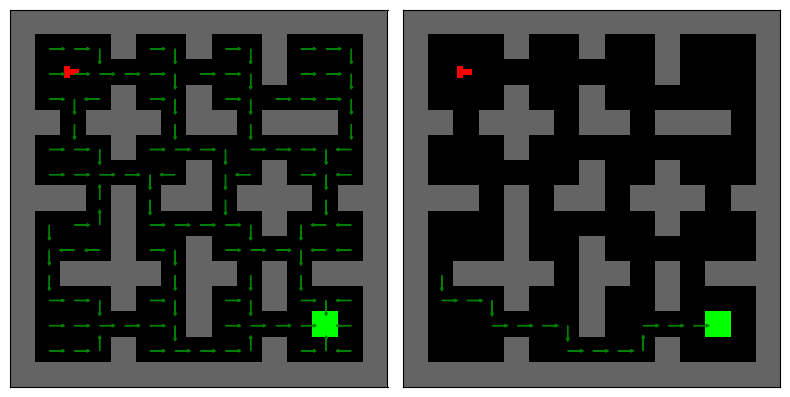

In [96]:
from projects.socialsf.renderer import place_arrows_on_image, show_path_to_goal
from projects.socialsf.maze import find_optimal_actions
# Render the initial state
image = env_renderer.render_state(env_state, env_params)

# Find the optimal actions for each position
actions = find_optimal_actions(env_state.maze_map, floor_array, wall_array, goal_array)

# # Place the arrows on the rendered image

fig, axs = plt.subplots(1, 2, figsize=(8, 8))
place_arrows_on_image(image, actions, env_state, ax=axs[0], offset=8)

start_pos = (9, 0)  # Starting position (y, x)
show_path_to_goal(image, start_pos, actions, env_state, ax=axs[1], offset=8)

# Display the plot
plt.tight_layout()
plt.show()
# actions = find_optimal_actions(env_state.maze_map, floor_array, wall_array, goal_array)


In [57]:
from collections import deque

def find_optimal_actions(maze):
    rows, cols, _ = maze.shape
    goal_coords = []
    
    # Find the coordinates of the goal space(s)
    for i in range(rows):
        for j in range(cols):
            if maze[i, j, 0] == 8:
                goal_coords.append((i, j))
    
    # Perform BFS starting from the goal space(s)
    queue = deque(goal_coords)
    distances = {coord: 0 for coord in goal_coords}
    prev = {}
    
    while queue:
        y, x = queue.popleft()
        for dy, dx in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < rows and 0 <= nx < cols and maze[ny, nx, 0] == 1 and (ny, nx) not in distances:
                distances[(ny, nx)] = distances[(y, x)] + 1
                prev[(ny, nx)] = (y, x)
                queue.append((ny, nx))
    
    # Find the optimal action for each free space
    actions = {}
    for y in range(rows):
        for x in range(cols):
            if maze[y, x, 0] == 1:
                min_distance = float('inf')
                best_action = None
                for dy, dx, action in [(0, 1, 'right'), (0, -1, 'left'), (1, 0, 'down'), (-1, 0, 'up')]:
                    ny, nx = y + dy, x + dx
                    if 0 <= ny < rows and 0 <= nx < cols and (ny, nx) in distances:
                        if distances[(ny, nx)] < min_distance:
                            min_distance = distances[(ny, nx)]
                            best_action = action
                actions[(y, x)] = best_action
    
    return actions
find_optimal_actions(env_state.maze_map)

{(0, 0): 'right',
 (0, 1): 'right',
 (0, 2): 'down',
 (0, 4): 'right',
 (0, 5): 'down',
 (0, 7): 'right',
 (0, 8): 'down',
 (0, 10): 'right',
 (0, 11): 'right',
 (0, 12): 'down',
 (1, 0): 'right',
 (1, 1): 'right',
 (1, 2): 'right',
 (1, 3): 'right',
 (1, 4): 'right',
 (1, 5): 'down',
 (1, 6): 'right',
 (1, 7): 'right',
 (1, 8): 'down',
 (1, 10): 'right',
 (1, 11): 'right',
 (1, 12): 'down',
 (2, 0): 'right',
 (2, 1): 'down',
 (2, 2): 'left',
 (2, 4): 'right',
 (2, 5): 'down',
 (2, 7): 'right',
 (2, 8): 'down',
 (2, 9): 'right',
 (2, 10): 'right',
 (2, 11): 'right',
 (2, 12): 'down',
 (3, 1): 'down',
 (3, 5): 'down',
 (3, 8): 'down',
 (3, 12): 'down',
 (4, 0): 'right',
 (4, 1): 'right',
 (4, 2): 'down',
 (4, 4): 'right',
 (4, 5): 'right',
 (4, 6): 'right',
 (4, 7): 'down',
 (4, 8): 'right',
 (4, 9): 'right',
 (4, 10): 'right',
 (4, 11): 'down',
 (4, 12): 'left',
 (5, 0): 'right',
 (5, 1): 'right',
 (5, 2): 'right',
 (5, 3): 'right',
 (5, 4): 'down',
 (5, 5): 'left',
 (5, 7): 'down',
 (

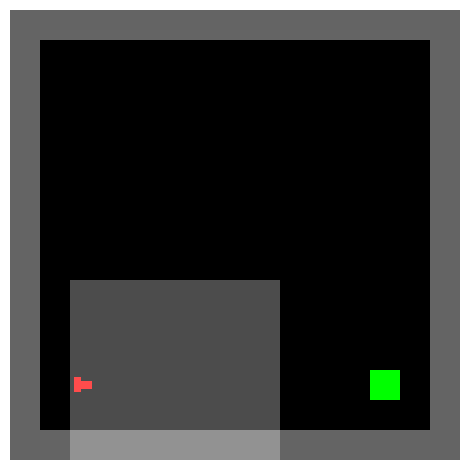

In [22]:
seed=3
rng = jax.random.PRNGKey(seed)

level = SimpleMaze1 = """
.............
.............
.............
.............
.............
.............
.............
.............
.............
.............
.............
.>.........G.
.............
""".strip()

level = Level.from_str(level)

env = Maze(max_height=13, max_width=13, agent_view_size=7, normalize_obs=True)
env_params = env.default_params
env_renderer = MazeRenderer(env, tile_size=8)
obs, env_state = env.reset_to_level(rng, level, env_params)

image = env_renderer.render_state(env_state, env_params)
visualizer.display_image(image)